In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import os,sys
from datetime import datetime
from scipy.signal import detrend

import warnings
warnings.filterwarnings("ignore")

In [32]:
SAMpath='/work/bk1377/b382037/WP7/To_Share/SAM_results/'
EdSpath='/work/bk1377/b382037/WP7/To_Share/Eddyfeedback_results/'

ERA5hist_tau = np.loadtxt(SAMpath+'ERA51979_2023_Jul2Jun_timescale.out')
ERA5hist_b = np.loadtxt(EdSpath+'ERA5_1980_2023_Eddyfeedbackstrength.out')

IFS9hist_tau = np.loadtxt(SAMpath+'ifs-amip_9km_hist_Jul2Jun_timescale.out')
IFS9hist_tau_std = np.loadtxt(SAMpath+'ifs-amip_9km_hist_Jul2Jun_std_bootstraptime1000.out')
IFS9hist_b = np.loadtxt(EdSpath+'ifs-amip_9km_hist_1980_2023_Eddyfeedbackstrength.out')

IFS9noed_tau = np.loadtxt(SAMpath+'ifs-amip_9km_hist_alr20_Jul2Jun_timescale.out')
IFS9noed_tau_std = np.loadtxt(SAMpath+'ifs-amip_9km_hist_alr20_Jul2Jun_std_bootstraptime1000.out')
IFS9noed_b = np.loadtxt(EdSpath+'ifs-amip_9km_alr_1980_2023_Eddyfeedbackstrength.out')

#HadGEM experiments
HGEMhist_tau = np.loadtxt(SAMpath+'HadGEM3-GC5-EERIE-N640_AMIP_Jul2Jun_timescale.out')
HGEMnoed_tau = np.loadtxt(SAMpath+'HadGEM3-GC5-EERIE-N640_SmoothAnom_Jul2Jun_timescale.out')

In [3]:
IFS28hist_tau     = {}
IFS28hist_b       = {}
# no eddies
IFS28noed_tau     = {}
IFS28noed_b       = {}
# no fronts
IFS28nofr_tau     = {}
IFS28nofr_b       = {}

for ens in range(5):
    
    ensname='_ens'+str(ens+1)
    # historical
    IFS28hist_tau[ens]        = np.loadtxt(SAMpath+'ifs-amip_28km_hist'+ensname+'_Jul2Jun_timescale.out')
    IFS28hist_b[ens]          = np.loadtxt(EdSpath+'ifs-amip_28km_hist'+ensname+'_1980_2023_Eddyfeedbackstrength.out')
    # no eddies
    IFS28noed_tau[ens]        = np.loadtxt(SAMpath+'ifs-amip_28km_hist_alr20'+ensname+'_Jul2Jun_timescale.out')
    IFS28noed_b[ens]          = np.loadtxt(EdSpath+'ifs-amip_28km_alr'+ensname+'_1980_2023_Eddyfeedbackstrength.out')
    # no fronts
    IFS28nofr_tau[ens]        = np.loadtxt(SAMpath+'ifs-amip_28km_hist_clr20'+ensname+'_Jul2Jun_timescale.out')
    IFS28nofr_b[ens]          = np.loadtxt(EdSpath+'ifs-amip_28km_clr'+ensname+'_1980_2023_Eddyfeedbackstrength.out')
    # ---------

In [4]:
SFpath='/work/bk1377/b382037/WP7/To_Share/Friction_results/'

ERA5hist_NDJf = np.loadtxt(SFpath+'ERA5_1980_2023_NDJslope_frescaled.out')
ERA5hist_FMAf = np.loadtxt(SFpath+'ERA5_1980_2023_FMAslope_frescaled.out')

IFS9hist_NDJf = np.loadtxt(SFpath+'9km_hist_1980-2023_NDJslope_frescaled.out')
IFS9hist_FMAf = np.loadtxt(SFpath+'9km_hist_1980-2023_FMAslope_frescaled.out')
IFS9noed_NDJf = np.loadtxt(SFpath+'9km_hist-c-0-a-lr20_1980-2023_NDJslope_frescaled.out')
IFS9noed_FMAf = np.loadtxt(SFpath+'9km_hist-c-0-a-lr20_1980-2023_FMAslope_frescaled.out')

In [5]:
IFS28hist_NDJf     = {}
IFS28hist_FMAf     = {}
# no eddies
IFS28noed_NDJf     = {}
IFS28noed_FMAf     = {}
# no fronts
IFS28nofr_NDJf     = {}
IFS28nofr_FMAf     = {}

for ens in range(5):
   
    ensname='_ens'+str(ens+1)
    # historical
    IFS28hist_NDJf[ens]        = np.loadtxt(SFpath+'28km_hist'+ensname+'_1980-2023_NDJslope_frescaled.out')
    IFS28hist_FMAf[ens]        = np.loadtxt(SFpath+'28km_hist'+ensname+'_1980-2023_FMAslope_frescaled.out')
    # no eddies
    IFS28noed_NDJf[ens]        = np.loadtxt(SFpath+'28km_hist-c-0-a-lr20'+ensname+'_1980-2023_NDJslope_frescaled.out')
    IFS28noed_FMAf[ens]        = np.loadtxt(SFpath+'28km_hist-c-0-a-lr20'+ensname+'_1980-2023_FMAslope_frescaled.out')
    # no fronts
    IFS28nofr_NDJf[ens]        = np.loadtxt(SFpath+'28km_hist-c-lr20-a-0'+ensname+'_1980-2023_NDJslope_frescaled.out')
    IFS28nofr_FMAf[ens]        = np.loadtxt(SFpath+'28km_hist-c-lr20-a-0'+ensname+'_1980-2023_FMAslope_frescaled.out')
    # ---------

In [6]:
SFpath='/work/bk1377/b382037/WP7/To_Share/Friction_results/'

ERA5hist_NDJfres = np.loadtxt(SFpath+'ERA5_1980_2023_NDJslope_fres.out')

IFS9hist_NDJfres = np.loadtxt(SFpath+'9km_hist_1980-2023_NDJslope_fres.out')
IFS9hist_FMAfres = np.loadtxt(SFpath+'9km_hist_1980-2023_FMAslope_fres.out')
IFS9noed_NDJfres = np.loadtxt(SFpath+'9km_alr_1980-2023_NDJslope_fres.out')
IFS9noed_FMAfres = np.loadtxt(SFpath+'9km_alr_1980-2023_FMAslope_fres.out')

In [7]:
IFS28hist_NDJfres     = {}
IFS28hist_FMAfres     = {}
# no eddies
IFS28noed_NDJfres     = {}
IFS28noed_FMAfres     = {}
# no fronts
IFS28nofr_NDJfres     = {}
IFS28nofr_FMAfres     = {}

for ens in range(5):
   
    ensname='_ens'+str(ens+1)
    # historical
    IFS28hist_NDJfres[ens]        = np.loadtxt(SFpath+'28km_hist'+ensname+'_1980-2023_NDJslope_fres.out')
    IFS28hist_FMAfres[ens]        = np.loadtxt(SFpath+'28km_hist'+ensname+'_1980-2023_FMAslope_fres.out')
    # no eddies
    IFS28noed_NDJfres[ens]        = np.loadtxt(SFpath+'28km_alr'+ensname+'_1980-2023_NDJslope_fres.out')
    IFS28noed_FMAfres[ens]        = np.loadtxt(SFpath+'28km_alr'+ensname+'_1980-2023_FMAslope_fres.out')
    # no fronts
    IFS28nofr_NDJfres[ens]        = np.loadtxt(SFpath+'28km_clr'+ensname+'_1980-2023_NDJslope_fres.out')
    IFS28nofr_FMAfres[ens]        = np.loadtxt(SFpath+'28km_clr'+ensname+'_1980-2023_FMAslope_fres.out')
    # ---------

In [8]:
### frictional timescale

ERA5hist_NDJft = np.loadtxt(SFpath+'ERA5_1980_2023_NDJslope_ftimescale.out')

IFS9hist_NDJft = np.loadtxt(SFpath+'9km_hist_1980-2023_NDJslope_ftimescale.out')
IFS9noed_NDJft = np.loadtxt(SFpath+'9km_hist-c-0-a-lr20_1980-2023_NDJslope_ftimescale.out')

IFS28hist_NDJft     = {}
# no eddies
IFS28noed_NDJft     = {}
# no fronts
IFS28nofr_NDJft     = {}

for ens in range(5):
   
    ensname='_ens'+str(ens+1)
    # historical
    IFS28hist_NDJft[ens]        = np.loadtxt(SFpath+'28km_hist'+ensname+'_1980-2023_NDJslope_ftimescale.out')
    # no eddies
    IFS28noed_NDJft[ens]        = np.loadtxt(SFpath+'28km_hist-c-0-a-lr20'+ensname+'_1980-2023_NDJslope_ftimescale.out')
    # ---------

In [9]:
### u

ERA5hist_NDJu = np.loadtxt(SFpath+'ERA5_1980_2023_NDJslope_u.out')

IFS9hist_NDJu = np.loadtxt(SFpath+'9km_hist_1980-2023_NDJslope_u.out')
IFS9noed_NDJu = np.loadtxt(SFpath+'9km_hist-c-0-a-lr20_1980-2023_NDJslope_u.out')

IFS28hist_NDJu     = {}
# no eddies
IFS28noed_NDJu     = {}
# no fronts
IFS28nofr_NDJu     = {}

for ens in range(5):
   
    ensname='_ens'+str(ens+1)
    # historical
    IFS28hist_NDJu[ens]        = np.loadtxt(SFpath+'28km_hist'+ensname+'_1980-2023_NDJslope_u.out')
    # no eddies
    IFS28noed_NDJu[ens]        = np.loadtxt(SFpath+'28km_hist-c-0-a-lr20'+ensname+'_1980-2023_NDJslope_u.out')
    # ---------

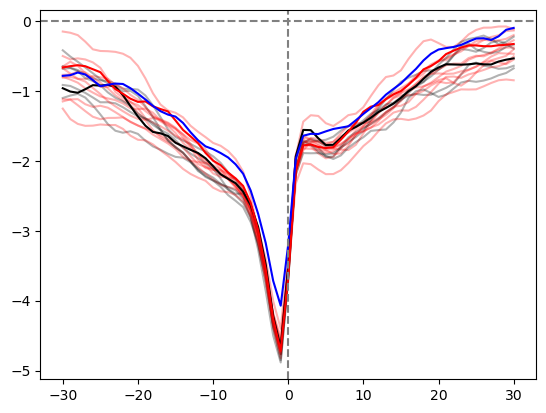

In [10]:
import matplotlib.pyplot as plt
lagaxis = np.arange(-30,31,1)

#plt.plot(lagaxis, ANNslope_m*86400.,'k')
for ens in range(5):
    plt.plot(lagaxis, IFS28hist_NDJfres[ens],'k', alpha=0.3)
    plt.plot(lagaxis, IFS28noed_NDJfres[ens],'r', alpha=0.3)
    plt.plot(lagaxis, IFS28nofr_NDJfres[ens],'r', alpha=0.3)


plt.plot(lagaxis, IFS9hist_NDJfres,'k')
plt.plot(lagaxis, IFS9noed_NDJfres,'r')
plt.plot(lagaxis, ERA5hist_NDJfres,'b')
plt.axvline(0,linestyle='dashed', color='gray')
plt.axhline(0,linestyle='dashed', color='gray')

### Jet info

In [11]:
WSJpath='/work/bk1377/b382037/WP7/To_Share/Westjet_results/'
ERA5_jetinfo = pd.read_csv(WSJpath+'ERA5_westerlyjet_1980_2023.csv')
ERA5_jetloc    = ERA5_jetinfo [(ERA5_jetinfo ["Period"] == '1980-2023 ANN')]['jet_lat'].values[0]
ERA5_jetlocNDJ = ERA5_jetinfo [(ERA5_jetinfo ["Period"] == '1980-2023 NDJ')]['jet_lat'].values[0]

# 9 km:

# historical
AMIP9_jetinfo   = pd.read_csv(WSJpath+'ifs-amip_9km_hist_1980-2023_westerlyjet.csv')
AMIP9_jetloc    = AMIP9_jetinfo [(AMIP9_jetinfo ["Period"] == '1980-2023 ANN')]['jet_lat'].values[0]
AMIP9_jetlocNDJ = AMIP9_jetinfo [(AMIP9_jetinfo ["Period"] == '1980-2023 NDJ')]['jet_lat'].values[0]
# no eddies
AMIP9noed_jetinfo   = pd.read_csv(WSJpath+'ifs-amip_9km_hist_alr20_1980-2023_westerlyjet.csv')
AMIP9noed_jetloc    = AMIP9noed_jetinfo [(AMIP9noed_jetinfo ["Period"] == '1980-2023 ANN')]['jet_lat'].values[0]
AMIP9noed_jetlocNDJ = AMIP9noed_jetinfo [(AMIP9noed_jetinfo ["Period"] == '1980-2023 NDJ')]['jet_lat'].values[0]

# 28 km:

# five ensemble members: 
# historical
AMIP28_jetloc        = {}
AMIP28_jetlocNDJ     = {}
# no eddies
AMIP28noed_jetloc    = {}
AMIP28noed_jetlocNDJ = {}
# no fronts
AMIP28nofr_jetloc    = {}
AMIP28nofr_jetlocNDJ = {}

for ens in range(5):

    ensname='_ens'+str(ens+1)
    # historical
    AMIP28_jetinfo        = pd.read_csv(WSJpath+'ifs-amip_28km_hist'+ensname+'_1980-2023_westerlyjet.csv') 
    AMIP28_jetloc[ens]    = AMIP28_jetinfo [(AMIP28_jetinfo ["Period"] == '1980-2023 ANN')]['jet_lat'].values[0]
    AMIP28_jetlocNDJ[ens] = AMIP28_jetinfo [(AMIP28_jetinfo ["Period"] == '1980-2023 NDJ')]['jet_lat'].values[0]
    del AMIP28_jetinfo
    # no eddies
    AMIP28noed_jetinfo        = pd.read_csv(WSJpath+'ifs-amip_28km_hist_alr20'+ensname+'_1980-2023_westerlyjet.csv') 
    AMIP28noed_jetloc[ens]    = AMIP28noed_jetinfo [(AMIP28noed_jetinfo ["Period"] == '1980-2023 ANN')]['jet_lat'].values[0]
    AMIP28noed_jetlocNDJ[ens] = AMIP28noed_jetinfo [(AMIP28noed_jetinfo ["Period"] == '1980-2023 NDJ')]['jet_lat'].values[0]
    del AMIP28noed_jetinfo
    # no fronts
    AMIP28nofr_jetinfo        = pd.read_csv(WSJpath+'ifs-amip_28km_hist_clr20'+ensname+'_1980-2023_westerlyjet.csv') 
    AMIP28nofr_jetloc[ens]    = AMIP28nofr_jetinfo [(AMIP28nofr_jetinfo ["Period"] == '1980-2023 ANN')]['jet_lat'].values[0]
    AMIP28nofr_jetlocNDJ[ens] = AMIP28nofr_jetinfo [(AMIP28nofr_jetinfo ["Period"] == '1980-2023 NDJ')]['jet_lat'].values[0]
    del AMIP28nofr_jetinfo
    # ---------

    

### Calculate the ensemble means...

In [12]:
IFS28hist_NDJf_2d = np.vstack(list(IFS28hist_NDJf.values()))
IFS28noed_NDJf_2d = np.vstack(list(IFS28noed_NDJf.values()))
IFS28nofr_NDJf_2d = np.vstack(list(IFS28nofr_NDJf.values()))

IFS28hist_NDJf_em = np.mean(IFS28hist_NDJf_2d, axis=0)
IFS28noed_NDJf_em = np.mean(IFS28noed_NDJf_2d, axis=0)
IFS28nofr_NDJf_em = np.mean(IFS28nofr_NDJf_2d, axis=0)

In [13]:
IFS28hist_tau_2d = np.vstack(list(IFS28hist_tau.values()))
IFS28noed_tau_2d = np.vstack(list(IFS28noed_tau.values()))
IFS28nofr_tau_2d = np.vstack(list(IFS28nofr_tau.values()))

IFS28hist_tau_em = np.mean(IFS28hist_tau_2d, axis=0)
IFS28noed_tau_em = np.mean(IFS28noed_tau_2d, axis=0)
IFS28nofr_tau_em = np.mean(IFS28nofr_tau_2d, axis=0)

In [14]:
IFS28hist_b_2d = np.vstack(list(IFS28hist_b.values()))
IFS28noed_b_2d = np.vstack(list(IFS28noed_b.values()))
IFS28nofr_b_2d = np.vstack(list(IFS28nofr_b.values()))

IFS28hist_b_em = np.mean(IFS28hist_b_2d, axis=0)
IFS28noed_b_em = np.mean(IFS28noed_b_2d, axis=0)
IFS28nofr_b_em = np.mean(IFS28nofr_b_2d, axis=0)

In [15]:
AMIP28_jetNDJ_2d = np.vstack(list(AMIP28_jetlocNDJ.values()))
AMIP28noed_jetNDJ_2d = np.vstack(list(AMIP28noed_jetlocNDJ.values()))
AMIP28nofr_jetNDJ_2d = np.vstack(list(AMIP28nofr_jetlocNDJ.values()))

AMIP28_jetNDJem = np.mean(AMIP28_jetNDJ_2d, axis=0)
AMIP28noed_jetNDJem = np.mean(AMIP28noed_jetNDJ_2d, axis=0)
AMIP28nofr_jetNDJem = np.mean(AMIP28nofr_jetNDJ_2d, axis=0)

### NDJ averaged tau

In [35]:
ERA5_tau = np.mean(ERA5hist_tau)
ERA5_NDJtau = np.mean(ERA5hist_tau[123:215])
ERA5_Dtau = np.mean(ERA5hist_tau[153:184])

AMIP9_tau    = np.mean(IFS9hist_tau)
AMIP9_NDJtau = np.mean(IFS9hist_tau[123:215])
AMIP9_Dtau = np.mean(IFS9hist_tau[153:184])
AMIP9noed_tau    = np.mean(IFS9noed_tau)
AMIP9noed_NDJtau = np.mean(IFS9noed_tau[123:215])
AMIP9noed_Dtau = np.mean(IFS9noed_tau[153:184])

AMIP28_tau    = {}
AMIP28_NDJtau = {}
AMIP28_Dtau = {}
AMIP28noed_tau    = {}
AMIP28noed_NDJtau = {}
AMIP28noed_Dtau = {}
AMIP28nofr_tau    = {}
AMIP28nofr_NDJtau = {}
AMIP28nofr_Dtau = {}

for ens in range(5):
    AMIP28_tau[ens]    = np.mean(IFS28hist_tau[ens])
    AMIP28_NDJtau[ens] = np.mean(IFS28hist_tau[ens][123:215])
    AMIP28_Dtau[ens] = np.mean(IFS28hist_tau[ens][153:184])
    AMIP28noed_tau[ens]    = np.mean(IFS28noed_tau[ens])
    AMIP28noed_NDJtau[ens] = np.mean(IFS28noed_tau[ens][123:215])
    AMIP28noed_Dtau[ens] = np.mean(IFS28noed_tau[ens][153:184])
    AMIP28nofr_tau[ens]    = np.mean(IFS28nofr_tau[ens])
    AMIP28nofr_NDJtau[ens] = np.mean(IFS28nofr_tau[ens][123:215])
    AMIP28nofr_Dtau[ens] = np.mean(IFS28nofr_tau[ens][153:184])

In [17]:
AMIP28_NDJtau_2d = np.vstack(list(AMIP28_NDJtau.values()))
AMIP28noed_NDJtau_2d = np.vstack(list(AMIP28noed_NDJtau.values()))
AMIP28nofr_NDJtau_2d = np.vstack(list(AMIP28nofr_NDJtau.values()))

AMIP28_NDJtauem = np.mean(AMIP28_NDJtau_2d, axis=0)
AMIP28noed_NDJtauem = np.mean(AMIP28noed_NDJtau_2d, axis=0)
AMIP28nofr_NDJtauem = np.mean(AMIP28nofr_NDJtau_2d, axis=0)

AMIP28_Dtau_2d = np.vstack(list(AMIP28_Dtau.values()))
AMIP28noed_Dtau_2d = np.vstack(list(AMIP28noed_Dtau.values()))
AMIP28nofr_Dtau_2d = np.vstack(list(AMIP28nofr_Dtau.values()))

AMIP28_Dtauem = np.mean(AMIP28_Dtau_2d, axis=0)
AMIP28noed_Dtauem = np.mean(AMIP28noed_Dtau_2d, axis=0)
AMIP28nofr_Dtauem = np.mean(AMIP28nofr_Dtau_2d, axis=0)

### NDJ averaged b

In [18]:
#ERA5hist_b : size 14, from 6,7,8,9,10,11,12,1,2....6,7

ERA5_NDJb = np.mean(ERA5hist_b[5:8])
AMIP9_NDJb = np.mean(IFS9hist_b[5:8])
AMIP9noed_NDJb = np.mean(IFS9noed_b[5:8])

ERA5_Db = np.mean(ERA5hist_b[6:7])
AMIP9_Db = np.mean(IFS9hist_b[6:7])
AMIP9noed_Db = np.mean(IFS9noed_b[6:7])

AMIP28_NDJb = {}
AMIP28noed_NDJb = {}
AMIP28nofr_NDJb = {}

AMIP28_Db = {}
AMIP28noed_Db = {}
AMIP28nofr_Db = {}

for ens in range(5):
    AMIP28_NDJb[ens] = np.mean(IFS28hist_b[ens][5:8])
    AMIP28noed_NDJb[ens] = np.mean(IFS28noed_b[ens][5:8])
    AMIP28nofr_NDJb[ens] = np.mean(IFS28nofr_b[ens][5:8])
    AMIP28_Db[ens] = np.mean(IFS28hist_b[ens][6:7])
    AMIP28noed_Db[ens] = np.mean(IFS28noed_b[ens][6:7])
    AMIP28nofr_Db[ens] = np.mean(IFS28nofr_b[ens][6:7])

In [19]:
AMIP28_NDJb_2d = np.vstack(list(AMIP28_NDJb.values()))
AMIP28noed_NDJb_2d = np.vstack(list(AMIP28noed_NDJb.values()))
AMIP28nofr_NDJb_2d = np.vstack(list(AMIP28nofr_NDJb.values()))

AMIP28_NDJbem = np.mean(AMIP28_NDJb_2d, axis=0)
AMIP28noed_NDJbem = np.mean(AMIP28noed_NDJb_2d, axis=0)
AMIP28nofr_NDJbem = np.mean(AMIP28nofr_NDJb_2d, axis=0)

AMIP28_Db_2d = np.vstack(list(AMIP28_Db.values()))
AMIP28noed_Db_2d = np.vstack(list(AMIP28noed_Db.values()))
AMIP28nofr_Db_2d = np.vstack(list(AMIP28nofr_Db.values()))

AMIP28_Dbem = np.mean(AMIP28_Db_2d, axis=0)
AMIP28noed_Dbem = np.mean(AMIP28noed_Db_2d, axis=0)
AMIP28nofr_Dbem = np.mean(AMIP28nofr_Db_2d, axis=0)

### NDJ averaged f

In [20]:
#ERA5hist_b : size 14, from 6,7,8,9,10,11,12,1,2....6,7
rescale_factor = 1.225*8432/1.204/8464  #
# (at 15 °C, 70% RH, 100 kPa): Moist air density: 1.204 kg/m³; Atmosphere column depth (uniform density): 8464 m


ERA5_NDJf = np.mean(ERA5hist_NDJf[37:48])*rescale_factor
AMIP9_NDJf = np.mean(IFS9hist_NDJf[37:48])*rescale_factor
AMIP9noed_NDJf = np.mean(IFS9noed_NDJf[37:48])*rescale_factor

AMIP28_NDJf = {}
AMIP28noed_NDJf = {}
AMIP28nofr_NDJf = {}

for ens in range(5):
    AMIP28_NDJf[ens] = np.mean(IFS28hist_NDJf[ens][37:48])*rescale_factor
    AMIP28noed_NDJf[ens] = np.mean(IFS28noed_NDJf[ens][37:48])*rescale_factor
    AMIP28nofr_NDJf[ens] = np.mean(IFS28nofr_NDJf[ens][37:48])*rescale_factor

In [21]:
#ERA5hist_b : size 14, from 6,7,8,9,10,11,12,1,2....6,7

ERA5_NDJfres = np.mean(ERA5hist_NDJfres[37:48])
AMIP9_NDJfres = np.mean(IFS9hist_NDJfres[37:48])
AMIP9noed_NDJfres = np.mean(IFS9noed_NDJfres[37:48])

AMIP28_NDJfres = {}
AMIP28noed_NDJfres = {}
AMIP28nofr_NDJfres = {}

for ens in range(5):
    AMIP28_NDJfres[ens] = np.mean(IFS28hist_NDJfres[ens][37:48])
    AMIP28noed_NDJfres[ens] = np.mean(IFS28noed_NDJfres[ens][37:48])
    AMIP28nofr_NDJfres[ens] = np.mean(IFS28nofr_NDJfres[ens][37:48])

In [22]:

ERA5_NDJu = np.mean(ERA5hist_NDJu[37:48])
AMIP9_NDJu = np.mean(IFS9hist_NDJu[37:48])
AMIP9noed_NDJu = np.mean(IFS9noed_NDJu[37:48])

AMIP28_NDJu = {}
AMIP28noed_NDJu = {}

for ens in range(5):
    AMIP28_NDJu[ens] = np.mean(IFS28hist_NDJu[ens][37:48])
    AMIP28noed_NDJu[ens] = np.mean(IFS28noed_NDJu[ens][37:48])

ERA5_NDJft         = -1*ERA5_NDJu/ERA5_NDJfres
AMIP9_NDJft        = -1*AMIP9_NDJu/AMIP9_NDJfres
AMIP9noed_NDJft    = -1*AMIP9noed_NDJu/AMIP9noed_NDJfres

AMIP28_NDJft = {}
AMIP28noed_NDJft = {}

for ens in range(5):
    AMIP28_NDJft[ens]        = -1*AMIP28_NDJu[ens]/AMIP28_NDJfres[ens]
    AMIP28noed_NDJft[ens]    = -1*AMIP28noed_NDJu[ens]/AMIP28noed_NDJfres[ens]
    

#tf/(1-b*tf)
ERA5_NDJnewE       = (ERA5_NDJft)/(1.-ERA5_NDJb*ERA5_NDJft)
AMIP9_NDJnewE      = (AMIP9_NDJft)/(1.-AMIP9_NDJb*AMIP9_NDJft)
AMIP9noed_NDJnewE  = (AMIP9noed_NDJft)/(1.-AMIP9noed_NDJb*AMIP9noed_NDJft)

AMIP28_NDJnewE     = {}
AMIP28noed_NDJnewE = {}

for ens in range(5):
    AMIP28_NDJnewE[ens]     = (AMIP28_NDJft[ens])/(1.-AMIP28_NDJb[ens]*AMIP28_NDJft[ens])
    AMIP28noed_NDJnewE[ens] = (AMIP28noed_NDJft[ens])/(1.-AMIP28noed_NDJb[ens]*AMIP28noed_NDJft[ens])

In [23]:
print(ERA5_NDJft, AMIP9_NDJft, AMIP9noed_NDJft)
for ens in range(5):
    print(AMIP28_NDJft[ens])
    print(AMIP28noed_NDJft[ens])

print('1.+ERA5_NDJb*ERA5_NDJft')
print(1.+ERA5_NDJb*ERA5_NDJft,1.+AMIP9_NDJb*AMIP9_NDJft,1.+AMIP9noed_NDJb*AMIP9noed_NDJft )

for ens in range(5):
    print(1.+AMIP28_NDJb[ens]*AMIP28_NDJft[ens])
    print(1.+AMIP28noed_NDJb[ens]*AMIP28noed_NDJft[ens])


print('newE')
print(ERA5_NDJnewE,AMIP9_NDJnewE, AMIP9noed_NDJnewE)
for ens in range(5):
    print(AMIP28_NDJnewE[ens])
    print(AMIP28noed_NDJnewE[ens])

print('b')
print(ERA5_NDJb, AMIP9_NDJb, AMIP9noed_NDJb)
for ens in range(5):
    print(AMIP28_NDJb[ens])
    print(AMIP28noed_NDJb[ens])

8.585790726968037 7.762641525611919 7.994618520408629
8.590414377606958
9.357622529867633
8.012868506042906
8.161040223234329
7.525239461172169
8.191252466733433
8.049768215482391
8.157788966792497
7.506191609071255
7.466298364530874
1.+ERA5_NDJb*ERA5_NDJft
1.4801886884717916 1.5872006017479934 1.4329714160034006
1.528147782681526
1.424728048694123
1.7053504633994037
1.478190854976093
1.5474501769227653
1.6077425745616676
1.5235789331768599
1.6041931986699707
1.6371602486981336
1.6600567229072682
newE
16.517129459392528 18.804876069303194 14.09914552113051
18.20573065530157
16.26643278648589
27.194573588977057
15.639894971293431
16.628532544775446
20.882338830374024
16.89633136745961
20.61053256128971
20.687346361965837
21.963365266065175
b
0.05592830104320096 0.07564443106262145 0.05415785817648621
0.06148106010558396
0.045388457093506085
0.08802721058850067
0.058594350952307826
0.07274853906608995
0.07419409632774114
0.06504273404665775
0.07406335235312285
0.08488462350576337
0.08840

In [24]:
AMIP28_NDJf_2d = np.vstack(list(AMIP28_NDJf.values()))
AMIP28noed_NDJf_2d = np.vstack(list(AMIP28noed_NDJf.values()))
AMIP28nofr_NDJf_2d = np.vstack(list(AMIP28nofr_NDJf.values()))

AMIP28_NDJfem = np.mean(AMIP28_NDJf_2d, axis=0)
AMIP28noed_NDJfem = np.mean(AMIP28noed_NDJf_2d, axis=0)
AMIP28nofr_NDJfem = np.mean(AMIP28nofr_NDJf_2d, axis=0)

[0.29078257]
PearsonRResult(statistic=0.02620915797267802, pvalue=0.9355599380842983)
(12,)
[79.26250964]
PearsonRResult(statistic=0.521357302450616, pvalue=0.08215779207976733)
[-12.0271564]
PearsonRResult(statistic=-0.48063923588915825, pvalue=0.11371802729701558)


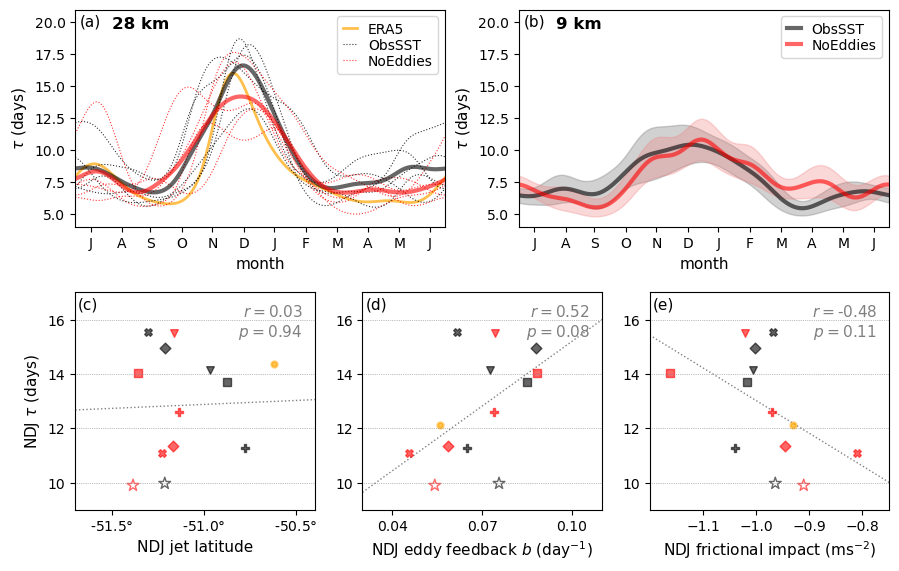

In [43]:
from sklearn.linear_model import LinearRegression
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

days=np.arange(0, 365, 1)

xlabels_ex=['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb', 'Mar','Apr','May','Jun','Jul']
xlabels=['J','A','S','O','N','D','J','F', 'M','A','M','J']

fig = plt.figure(figsize=(10.5,6.5))
gs  = gridspec.GridSpec(2,3, figure=fig)
#gs0 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0])
#----------------upper row
gsA = gs[0,:].subgridspec(1, 2)
ax0   =fig.add_subplot(gsA[0])
ax0l  =fig.add_subplot(gsA[1])
ax1   =fig.add_subplot(gs[1,0])
ax1l  =ax1
ax2   =fig.add_subplot(gs[1,1])
ax2l  =ax2
ax3   =fig.add_subplot(gs[1,2])
ax3l  =ax3
#-----------------------------------------------
# Seasonal variation of tau 
#-----------------------------------------------
ax0.plot(days, ERA5hist_tau,'orange',linewidth=2,label='ERA5',alpha=0.7)
for ens in range(5):
    ax0.plot(days, IFS28hist_tau[ens],'k',linestyle='dotted',linewidth=0.8, label='ObsSST', alpha=0.8)
    ax0.plot(days, IFS28noed_tau[ens],'r',linestyle='dotted',linewidth=0.8, label='NoEddies', alpha=0.8)
    #ax0.plot(days, IFS28nofr_tau[ens],'b',linestyle='dashed',linewidth=0.7, label='NoFronts', alpha=0.8)
    
    if ens == 0:
        ax0.legend(labelspacing=0.15,borderaxespad=0.5,borderpad=0.4,handlelength=1.)
ax0.plot(IFS28hist_tau_em,'k',linestyle='solid',linewidth=3, label='ObsSST28', alpha=0.6)
ax0.plot(IFS28noed_tau_em,'r',linestyle='solid',linewidth=3, label='NoEddies28', alpha=0.6)
#ax0.plot(IFS28nofr_tau_em,'b',linestyle='solid',linewidth=3, label='NoFronts28', alpha=0.6)
#axs[1].plot(days, IFS9alr_tau,'orange',label='AMIP9_noEdd')
#plt.xticks([15, 31+15, 59+15,90+15,120+15,151+15, 181+15,212+15,243+15,273+15,304+15,334+15], ['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb', 'Mar','Apr','May','Jun'])
ax0.set_xticks([15, 31+15, 59+15,90+15,120+15,151+15, 181+15,212+15,243+15,273+15,304+15,334+15], labels=xlabels)
ax0.set_ylabel(''r'$\tau$'' (days)',fontsize=11)
ax0.set_xlabel('month', size = 11)
ax0.set_xlim(0, 364)
ax0.set_ylim(4, 21)
#ax0.set_title('Seasonal variation of\n SAM decorrelation timescale', size = 11)
#-----------------------------------------------
#ax0l.plot(days, ERA5hist_tau,'orange',linewidth=2,label='ERA5',alpha=0.7)
ax0l.plot(days, IFS9hist_tau,'k',linestyle='solid',linewidth=3, label='ObsSST', alpha=0.6)
ax0l.plot(days, IFS9noed_tau,'r',linestyle='solid',linewidth=3, label='NoEddies', alpha=0.6)
ax0l.fill_between(days, IFS9hist_tau-IFS9hist_tau_std, IFS9hist_tau+IFS9hist_tau_std, color='dimgray',alpha=0.3)
ax0l.fill_between(days, IFS9noed_tau-IFS9noed_tau_std, IFS9noed_tau+IFS9noed_tau_std, color='lightcoral',alpha=0.3)
#axs[1].plot(days, IFS9alr_tau,'orange',label='AMIP9_noEdd')
#plt.xticks([15, 31+15, 59+15,90+15,120+15,151+15, 181+15,212+15,243+15,273+15,304+15,334+15], ['Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb', 'Mar','Apr','May','Jun'])
ax0l.set_xticks([15, 31+15, 59+15,90+15,120+15,151+15, 181+15,212+15,243+15,273+15,304+15,334+15], labels=xlabels)
ax0l.set_ylabel(''r'$\tau$'' (days)',fontsize=11)
ax0l.set_xlabel('month', size = 11)
ax0l.set_xlim(0, 364)
ax0l.set_ylim(4, 21)
ax0l.legend(labelspacing=0.15,borderaxespad=0.5,borderpad=0.4,handlelength=1.)
#=====================================================
#-----------------------------------------------
# Scatter plots of tau vs... 
marker_ens=['X','D','v','P','s']
#-----------------------------------------------
# For jet loc: 
#-----------------------------------------------
x1 = np.array([AMIP28_jetlocNDJ[exp] for exp in range(5)])
x2 = np.array([AMIP28noed_jetlocNDJ[exp] for exp in range(5)])
x3 = np.array([AMIP9noed_jetlocNDJ, AMIP9_jetlocNDJ])
#x3 = np.array([AMIP28nofr_jetlocNDJ[exp] for exp in range(5)])
x = np.concatenate((x1, x2, x3))
y1 = np.array([AMIP28_NDJtau[exp] for exp in range(5)])
y2 = np.array([AMIP28noed_NDJtau[exp] for exp in range(5)])
y3 = np.array([AMIP9noed_NDJtau, AMIP9_NDJtau])
#y3 = np.array([AMIP28nofr_NDJtau[exp] for exp in range(5)])
y = np.concatenate((y1, y2, y3))
regression_model = LinearRegression()
regression_model.fit(x.reshape(-1,1), y)
slope = regression_model.coef_
print(slope)
## Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = regression_model.score(x.reshape(-1,1), y)
#print('coefficient of determination:', r_sq)
Pearsonr= scipy.stats.pearsonr(x, y)
print(Pearsonr)
#----------
ymin=9
ymax=17
xmin=-51.7
xmax=-50.4
xrange=np.arange(xmin, xmax+0.1, 0.1).reshape(-1,1)
y_pred_jet = regression_model.predict(xrange)

deglabels=['-51.5'r'$\degree$','-51.0'r'$\degree$','-50.5'r'$\degree$']
ax1.scatter(ERA5_jetlocNDJ,  ERA5_Dtau,marker='o', color='orange', edgecolor='orange', linewidth=2, s=15, alpha=0.6)
for ens in range(5):
    ax1.scatter(AMIP28_jetlocNDJ[ens],  AMIP28_NDJtau[ens],marker=marker_ens[ens], color='k',  linewidth=1, s= 30, alpha=0.6, label='ObsSST')
    ax1.scatter(AMIP28noed_jetlocNDJ[ens], AMIP28noed_NDJtau[ens], marker=marker_ens[ens], color='r',linewidth=1, s= 30, alpha=0.6,label='NoEddies')
    #ax1.scatter(AMIP28nofr_jetlocNDJ[ens], AMIP28nofr_NDJtau[ens], marker=marker_ens[ens], color='b',  linewidth=1, s= 30, alpha=0.6,label='NoFronts')
    ax1.set_ylim(ymin, ymax)
    ax1.set_xlim(xmin, xmax)
    #if ens == 0:
    #    axs[0,1].legend(labelspacing=0.1,borderaxespad=0.2,borderpad=0.4,handlelength=1.)
#ax1.scatter(AMIP28_jetNDJem,  AMIP28_Dtauem, marker='o', color='k', edgecolor='k', linewidth=2, s= 80, alpha=0.6)
#ax1.scatter(AMIP28noed_jetNDJem, AMIP28noed_Dtauem, marker='o', color='r', edgecolor='r', linewidth=2, s= 80, alpha=0.6)
#ax1.scatter(AMIP28nofr_jetNDJem, AMIP28nofr_Dtauem,  marker='o', color='b', edgecolor='b', linewidth=2, s= 80, alpha=0.6)
ax1.grid(axis='y',color='gray', linestyle=':', linewidth=0.5)
ax1.set_xticks([-51.5,-51,-50.5], labels=deglabels)
ax1.set_yticks([10,12,14,16])
ax1.set_xlabel('NDJ jet latitude', size = 11)
ax1.set_ylabel('NDJ 'r'$\tau$'' (days)',fontsize=11)
#axs[0,1].set_ylabel(''r'$\degree$''',fontsize=11)
# Add error bars
# For x-axis 
##ax1.errorbar(AMIP28_jetNDJem, y=ymin+1.0 , xerr=[AMIP28_jetNDJem-AMIP28_jetNDJ_2d[:,0].min(), AMIP28_jetNDJ_2d[:,0].max()-AMIP28_jetNDJem], fmt='o',color='k', alpha=0.4)
##ax1.errorbar(AMIP28noed_jetNDJem, y=ymin+0.7 , xerr=[AMIP28noed_jetNDJem-AMIP28noed_jetNDJ_2d[:,0].min(), AMIP28noed_jetNDJ_2d[:,0].max()-AMIP28noed_jetNDJem], fmt='o',color='r', alpha=0.4)
#ax1.errorbar(AMIP28nofr_jetNDJem, y=ymin+0.4 , xerr=[AMIP28nofr_jetNDJem-AMIP28nofr_jetNDJ_2d[:,0].min(), AMIP28nofr_jetNDJ_2d[:,0].max()-AMIP28nofr_jetNDJem], fmt='o',color='b', alpha=0.4)
ax1.plot(xrange,y_pred_jet,color='gray', linewidth=1.0,linestyle='dotted', zorder=0)   
# For y-axis
#ax1.errorbar(xmin+0.21 , y=AMIP28_NDJtauem,     yerr=[AMIP28_NDJtauem-AMIP28_NDJtau_2d[:,0].min(), AMIP28_NDJtau_2d[:,0].max()-AMIP28_NDJtauem], fmt='o',color='k', alpha=0.4)
#ax1.errorbar(xmin+0.14 , y=AMIP28noed_NDJtauem, yerr=[AMIP28noed_NDJtauem-AMIP28noed_NDJtau_2d[:,0].min(), AMIP28noed_NDJtau_2d[:,0].max()-AMIP28noed_NDJtauem], fmt='o',color='r', alpha=0.4)
#ax1.errorbar(xmin+0.07 , y=AMIP28nofr_NDJtauem, yerr=[AMIP28nofr_NDJtauem-AMIP28nofr_NDJtau_2d[:,0].min(), AMIP28nofr_NDJtau_2d[:,0].max()-AMIP28nofr_NDJtauem], fmt='o',color='b', alpha=0.4)
ax1.text(0.95, 0.95, ''r'$r=$''{:.2f}'.format(Pearsonr[0])+'\n 'r'$p=$''{:.2f}'.format(Pearsonr[1]),
         fontsize=11,
         horizontalalignment='right', color='gray',
         verticalalignment='top',
         transform = ax1.transAxes)

#-----------------------
#ax1l.scatter(ERA5_jetlocNDJ,  ERA5_NDJtau,marker='o', color='orange', edgecolor='orange', linewidth=2, s= 15, alpha=0.6)
ax1l.scatter(AMIP9_jetlocNDJ,  AMIP9_NDJtau,marker='*', facecolor='none',edgecolor='k',  linewidth=1, s= 80, alpha=0.6, label='ObsSST')
ax1l.scatter(AMIP9noed_jetlocNDJ, AMIP9noed_NDJtau, marker='*', facecolor='none',edgecolor='r',  linewidth=1, s= 80, alpha=0.6,label='NoEddies')
#ax1l.scatter(AMIP9_jetlocNDJ,  AMIP9_NDJtau,marker='*', color='k',  linewidth=1, s= 30, alpha=0.6, label='ObsSST')
#ax1l.scatter(AMIP9noed_jetlocNDJ, AMIP9noed_NDJtau, marker='*', color='r',  linewidth=1, s= 30, alpha=0.6,label='NoEddies')
ax1l.set_ylim(ymin, ymax)
ax1l.set_xlim(xmin, xmax)
    #if ens == 0:
    #    axs[0,1].legend(labelspacing=0.1,borderaxespad=0.2,borderpad=0.4,handlelength=1.)
#ax1.scatter(AMIP28_jetNDJem,  AMIP28_Dtauem, marker='o', color='k', edgecolor='k', linewidth=2, s= 80, alpha=0.6)
#ax1.scatter(AMIP28noed_jetNDJem, AMIP28noed_Dtauem, marker='o', color='r', edgecolor='r', linewidth=2, s= 80, alpha=0.6)
#ax1.scatter(AMIP28nofr_jetNDJem, AMIP28nofr_Dtauem,  marker='o', color='b', edgecolor='b', linewidth=2, s= 80, alpha=0.6)
ax1l.grid(axis='y',color='gray', linestyle=':', linewidth=0.5)
ax1l.set_xticks([-51.5,-51,-50.5], labels=deglabels)
ax1l.set_yticks([10,12,14,16])
#-----------------------------------------------
# For eddy feedback b: 
#-----------------------------------------------
#-----------------------------------------------
x1 = np.array([AMIP28_NDJb[exp] for exp in range(5)])
x2 = np.array([AMIP28noed_NDJb[exp] for exp in range(5)])
x3 = np.array([AMIP9noed_NDJb, AMIP9_NDJb])
#x3 = np.array([AMIP28nofr_NDJb[exp] for exp in range(5)])
x = np.concatenate((x1, x2, x3))
#x = np.append(np.concatenate((x1, x2, x3)), ERA5_NDJb)
print(x.shape)
y1 = np.array([AMIP28_NDJtau[exp] for exp in range(5)])
y2 = np.array([AMIP28noed_NDJtau[exp] for exp in range(5)])
y3 = np.array([AMIP9noed_NDJtau, AMIP9_NDJtau])
#y3 = np.array([AMIP28nofr_NDJtau[exp] for exp in range(5)])
y = np.concatenate((y1, y2, y3))
#y = np.append(np.concatenate((y1, y2, y3)), ERA5_NDJtau)
regression_model = LinearRegression()
regression_model.fit(x.reshape(-1,1), y)
slope = regression_model.coef_
print(slope)
## Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = regression_model.score(x.reshape(-1,1), y)
#print('coefficient of determination:', r_sq)
Pearsonr= scipy.stats.pearsonr(x, y)
print(Pearsonr)
#----------
xmin=0.03
xmax=0.11
xrange=np.arange(xmin, xmax+0.1, 0.1).reshape(-1,1)
y_pred_b = regression_model.predict(xrange)
ax2.scatter(ERA5_NDJb,  ERA5_NDJtau,marker='o', color='orange', edgecolor='orange', linewidth=2, s= 15, alpha=0.6)
for ens in range(5):
    ax2.scatter(AMIP28_NDJb[ens],  AMIP28_NDJtau[ens],marker=marker_ens[ens], color='k', edgecolor='k', linewidth=1, s= 30, alpha=0.6, label='ObsSST')
    ax2.scatter(AMIP28noed_NDJb[ens], AMIP28noed_NDJtau[ens], marker=marker_ens[ens], color='r', edgecolor='r', linewidth=1, s= 30, alpha=0.6,label='NoEddies')
    #ax2.scatter(AMIP28nofr_NDJb[ens], AMIP28nofr_NDJtau[ens], marker=marker_ens[ens], color='b', edgecolor='b', linewidth=1, s= 30, alpha=0.6,label='NoFronts')
    ax2.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    #if ens == 0:
    #    axs[0,1].legend(labelspacing=0.1,borderaxespad=0.2,borderpad=0.4,handlelength=1.)
#ax2.set_title('NDJ\nEddy feedback '''r'$b$', size = 11)
ax2.set_xlabel('NDJ eddy feedback '''r'$b$'' ('''r'$\mathrm{day}^{-1}$'')', size = 11)
#ax2.set_ylabel('NDJ 'r'$\tau$''',fontsize=11)
ax2.grid(axis='y',color='gray', linestyle=':', linewidth=0.5)
ax2.plot(xrange,y_pred_b,color='gray', linewidth=1.0,linestyle='dotted', zorder=0) 
# Add error bars
# For x-axis 
##ax2.errorbar(AMIP28_NDJbem, y=ymin+1.0 , xerr=[AMIP28_NDJbem-AMIP28_NDJb_2d[:,0].min(), AMIP28_NDJb_2d[:,0].max()-AMIP28_NDJbem], fmt='o',color='k', alpha=0.4)
##ax2.errorbar(AMIP28noed_NDJbem, y=ymin+0.7 , xerr=[AMIP28noed_NDJbem-AMIP28noed_NDJb_2d[:,0].min(), AMIP28noed_NDJb_2d[:,0].max()-AMIP28noed_NDJbem], fmt='o',color='r', alpha=0.4)
#ax2.errorbar(AMIP28nofr_NDJbem, y=ymin+0.4 , xerr=[AMIP28nofr_NDJbem-AMIP28nofr_NDJb_2d[:,0].min(), AMIP28nofr_NDJb_2d[:,0].max()-AMIP28nofr_NDJbem], fmt='o',color='b', alpha=0.4)
#ax2.set_yticks([10,12,14,16])
ax2.set_xticks([0.04,0.07,0.10])
ax2.set_yticks([10,12,14,16])
# For y-axis
#ax2.errorbar(xmin+0.017 , y=AMIP28_NDJtauem,     yerr=[AMIP28_NDJtauem-AMIP28_NDJtau_2d[:,0].min(), AMIP28_NDJtau_2d[:,0].max()-AMIP28_NDJtauem], fmt='o',color='k', alpha=0.4)
#ax2.errorbar(xmin+0.011 , y=AMIP28noed_NDJtauem, yerr=[AMIP28noed_NDJtauem-AMIP28noed_NDJtau_2d[:,0].min(), AMIP28noed_NDJtau_2d[:,0].max()-AMIP28noed_NDJtauem], fmt='o',color='r', alpha=0.4)
#ax2.errorbar(xmin+0.005 , y=AMIP28nofr_NDJtauem, yerr=[AMIP28nofr_NDJtauem-AMIP28nofr_NDJtau_2d[:,0].min(), AMIP28nofr_NDJtau_2d[:,0].max()-AMIP28nofr_NDJtauem], fmt='o',color='b', alpha=0.4)
ax2.text(0.95, 0.95, ''r'$r=$''{:.2f}'.format(Pearsonr[0])+'\n 'r'$p=$''{:.2f}'.format(Pearsonr[1]),
         fontsize=11,
         horizontalalignment='right', color='gray',
         verticalalignment='top',
         transform = ax2.transAxes)

#-----------------------------------------------
#ax2l.scatter(ERA5_NDJb,  ERA5_NDJtau,marker='o', color='orange', edgecolor='orange', linewidth=2, s= 15, alpha=0.6)
ax2l.scatter(AMIP9_NDJb,  AMIP9_NDJtau,marker='*', facecolor='none', edgecolor='k',  linewidth=1, s= 80, alpha=0.6, label='ObsSST')
ax2l.scatter(AMIP9noed_NDJb, AMIP9noed_NDJtau, marker='*', facecolor='none', edgecolor='r',  linewidth=1, s= 80, alpha=0.6,label='NoEddies')
#ax2l.scatter(AMIP9_NDJb,  AMIP9_NDJtau,marker='*', color='k',  linewidth=1, s= 30, alpha=0.6, label='ObsSST')
#ax2l.scatter(AMIP9noed_NDJb, AMIP9noed_NDJtau, marker='*', color='r',  linewidth=1, s= 30, alpha=0.6,label='NoEddies')
ax2l.set_ylim(ymin, ymax)
ax2l.set_xlim(xmin, xmax)
ax2l.grid(axis='y',color='gray', linestyle=':', linewidth=0.5)
ax2l.set_yticks([10,12,14,16])
ax2l.set_xticks([0.04,0.07,0.10])
#-----------------------------------------------
# For windstress regressed on SAM: 
#-----------------------------------------------
#-----------------------------------------------
x1 = np.array([AMIP28_NDJf[exp] for exp in range(5)])
x2 = np.array([AMIP28noed_NDJf[exp] for exp in range(5)])
x3 = np.array([AMIP9noed_NDJf, AMIP9_NDJf])
#x3 = np.array([AMIP28nofr_NDJf[exp] for exp in range(5)])
x = np.concatenate((x1, x2, x3 ))

y1 = np.array([AMIP28_NDJtau[exp] for exp in range(5)])
y2 = np.array([AMIP28noed_NDJtau[exp] for exp in range(5)])
y3 = np.array([AMIP9noed_NDJtau, AMIP9_NDJtau])
#y3 = np.array([AMIP28nofr_NDJtau[exp] for exp in range(5)])
y = np.concatenate((y1, y2, y3 ))
regression_model = LinearRegression()
regression_model.fit(x.reshape(-1,1), y)
slope = regression_model.coef_
print(slope)
## Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = regression_model.score(x.reshape(-1,1), y)
#print('coefficient of determination:', r_sq)
Pearsonr= scipy.stats.pearsonr(x, y)
print(Pearsonr)
#----------
xmin=-1.2
xmax=-0.75
xrange=np.arange(xmin, xmax+0.1, 0.1).reshape(-1,1)
y_pred_f = regression_model.predict(xrange)
ax3.scatter(ERA5_NDJf,  ERA5_NDJtau,marker='o', color='orange', edgecolor='orange', linewidth=2, s= 15, alpha=0.6)
for ens in range(5):
    ax3.scatter(AMIP28_NDJf[ens],  AMIP28_NDJtau[ens],marker=marker_ens[ens], color='k',  linewidth=1, s= 30, alpha=0.6, label='ObsSST')
    ax3.scatter(AMIP28noed_NDJf[ens], AMIP28noed_NDJtau[ens], marker=marker_ens[ens], color='r', linewidth=1, s= 30, alpha=0.6,label='NoEddies')
    #ax3.scatter(AMIP28nofr_NDJf[ens], AMIP28nofr_NDJtau[ens], marker=marker_ens[ens], color='b',  linewidth=1, s= 30, alpha=0.6,label='NoFronts')
    ax3.set_ylim(ymin, ymax)
    ax3.set_xlim(xmin, xmax)
    #if ens == 0:
    #    axs[0,1].legend(labelspacing=0.1,borderaxespad=0.2,borderpad=0.4,handlelength=1.)
#ax3.set_title('NDJ\nsurface frictional impact', size = 11)
ax3.set_xlabel('NDJ frictional impact (m'''r'$\mathrm{s}^{-2}$'')', size = 11)
#ax3.set_ylabel('NDJ 'r'$\tau$''',fontsize=11)
ax3.grid(axis='y',color='gray', linestyle=':', linewidth=0.5)
ax3.set_yticks([10,12,14,16])
ax3.set_xticks([-1.2, -1.1,-1.0,-0.9,-0.8])
ax3.plot(xrange,y_pred_f,color='gray', linewidth=1.0,linestyle='dotted', zorder=0) 
# Add error bars
# Add error bars
# For x-axis 
##ax3.errorbar(AMIP28_NDJfem, y=ymin+1.0 , xerr=[AMIP28_NDJfem-AMIP28_NDJf_2d[:,0].min(), AMIP28_NDJf_2d[:,0].max()-AMIP28_NDJfem], fmt='o',color='k', alpha=0.4)
##ax3.errorbar(AMIP28noed_NDJfem, y=ymin+0.7 , xerr=[AMIP28noed_NDJfem-AMIP28noed_NDJf_2d[:,0].min(), AMIP28noed_NDJf_2d[:,0].max()-AMIP28noed_NDJfem], fmt='o',color='r', alpha=0.4)
#ax3.errorbar(AMIP28nofr_NDJfem, y=ymin+0.4 , xerr=[AMIP28nofr_NDJfem-AMIP28nofr_NDJf_2d[:,0].min(), AMIP28nofr_NDJf_2d[:,0].max()-AMIP28nofr_NDJfem], fmt='o',color='b', alpha=0.4)
# For y-axis
#ax2.errorbar(xmin+0.017 , y=AMIP28_NDJtauem,     yerr=[AMIP28_NDJtauem-AMIP28_NDJtau_2d[:,0].min(), AMIP28_NDJtau_2d[:,0].max()-AMIP28_NDJtauem], fmt='o',color='k', alpha=0.4)
#ax2.errorbar(xmin+0.011 , y=AMIP28noed_NDJtauem, yerr=[AMIP28noed_NDJtauem-AMIP28noed_NDJtau_2d[:,0].min(), AMIP28noed_NDJtau_2d[:,0].max()-AMIP28noed_NDJtauem], fmt='o',color='r', alpha=0.4)
#ax2.errorbar(xmin+0.005 , y=AMIP28nofr_NDJtauem, yerr=[AMIP28nofr_NDJtauem-AMIP28nofr_NDJtau_2d[:,0].min(), AMIP28nofr_NDJtau_2d[:,0].max()-AMIP28nofr_NDJtauem], fmt='o',color='b', alpha=0.4)
ax3.text(0.95, 0.95, ''r'$r=$''{:.2f}'.format(Pearsonr[0])+'\n 'r'$p=$''{:.2f}'.format(Pearsonr[1]),
         fontsize=11,
         horizontalalignment='right', color='gray',
         verticalalignment='top',
         transform = ax3.transAxes)

#----------------------------------
#ax3l.scatter(ERA5_NDJf,  ERA5_NDJtau,marker='o', color='orange', edgecolor='orange', linewidth=2, s= 15, alpha=0.6)
ax3l.scatter(AMIP9_NDJf,  AMIP9_NDJtau,marker='*', facecolor='none', edgecolor='k',  linewidth=1, s=80, alpha=0.6, label='ObsSST')
ax3l.scatter(AMIP9noed_NDJf, AMIP9noed_NDJtau, marker='*', facecolor='none', edgecolor='r', linewidth=1, s= 80, alpha=0.6,label='NoEddies')
#ax3l.scatter(AMIP9_NDJf,  AMIP9_NDJtau,marker='*', color='k',  linewidth=1, s= 30, alpha=0.6, label='ObsSST')
#ax3l.scatter(AMIP9noed_NDJf, AMIP9noed_NDJtau, marker='*', color='r', linewidth=1, s= 30, alpha=0.6,label='NoEddies')
ax3l.set_ylim(ymin, ymax)
ax3l.set_xlim(xmin, xmax)
    #if ens == 0:
    #    axs[0,1].legend(labelspacing=0.1,borderaxespad=0.2,borderpad=0.4,handlelength=1.)
ax3l.grid(axis='y',color='gray', linestyle=':', linewidth=0.5)
ax3l.set_yticks([10,12,14,16])
ax3l.set_xticks([-1.1,-1.0,-0.9,-0.8])

#===== labelling ==================================
plt.text(0.1, 0.97, '28 km', fontsize=12,
         horizontalalignment='left',
         verticalalignment='top', fontweight='bold',
         transform = ax0.transAxes)
plt.text(0.1, 0.97, '9 km', fontsize=12,
         horizontalalignment='left',
         verticalalignment='top', fontweight='bold',
         transform = ax0l.transAxes)

plt.text(0.012, 0.98, '(a)', fontsize=11,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax0.transAxes)
plt.text(0.012, 0.98, '(c)', fontsize=11,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax1.transAxes)
plt.text(0.012, 0.98, '(d)', fontsize=11,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax2.transAxes)
plt.text(0.012, 0.98, '(e)', fontsize=11,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax3.transAxes)


plt.text(0.012, 0.98, '(b)', fontsize=11,
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax0l.transAxes)

plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.savefig('Figure4_Eddyfeedbackstrength_SAMtimescale_jet_windstress_comparison_rev3', bbox_inches='tight', dpi=200)
plt.show()


### TESTING the timescale & b effects
tf/(1-b*tf), where tf is the frictional timescale

[-4.51291525]
PearsonRResult(statistic=-0.37290682975615114, pvalue=0.23252961293090288)
[-12.0271564]
PearsonRResult(statistic=-0.48063923588915825, pvalue=0.11371802729701558)
(12,)
[79.26250964]
PearsonRResult(statistic=0.521357302450616, pvalue=0.08215779207976733)
[0.3587858]
PearsonRResult(statistic=0.6143995064954273, pvalue=0.03353255244570018)


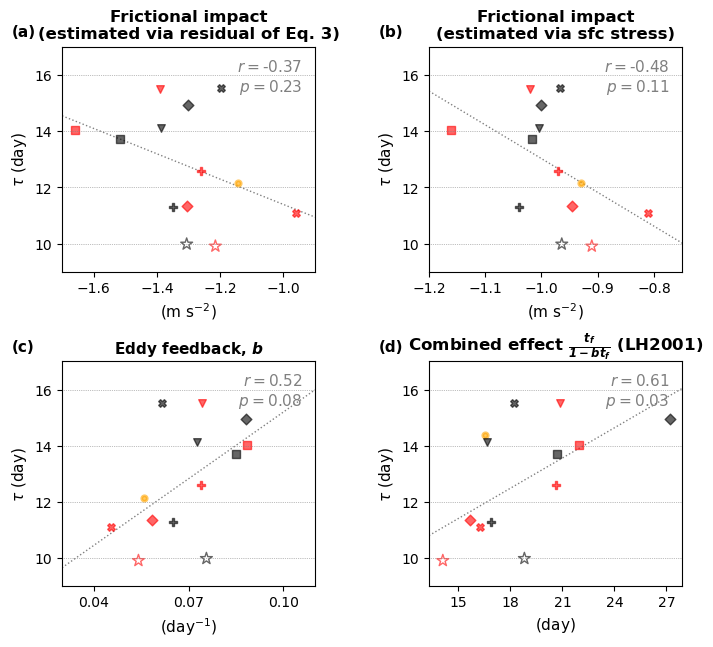

In [28]:
from sklearn.linear_model import LinearRegression
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

days=np.arange(0, 365, 1)

xlabels_ex=['Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb', 'Mar','Apr','May','Jun','Jul']
xlabels=['J','A','S','O','N','D','J','F', 'M','A','M','J']

fig = plt.figure(figsize=(8,7))
gs  = gridspec.GridSpec(2,2, figure=fig)
#gs0 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0])
#----------------upper row
ax0   =fig.add_subplot(gs[0])
ax1   =fig.add_subplot(gs[1])
ax2   =fig.add_subplot(gs[2])
ax3   =fig.add_subplot(gs[3])

#=====================================================
#-----------------------------------------------
# Scatter plots of tau vs... 
marker_ens=['X','D','v','P','s']
#-----------------------------------------------
# (a) Friction (residual)

x1 = np.array([AMIP28_NDJfres[exp] for exp in range(5)])
x2 = np.array([AMIP28noed_NDJfres[exp] for exp in range(5)])
x3 = np.array([AMIP9noed_NDJfres, AMIP9_NDJfres])
x = np.concatenate((x1, x2, x3 ))

y1 = np.array([AMIP28_NDJtau[exp] for exp in range(5)])
y2 = np.array([AMIP28noed_NDJtau[exp] for exp in range(5)])
y3 = np.array([AMIP9noed_NDJtau, AMIP9_NDJtau])
y = np.concatenate((y1, y2, y3 ))
regression_model = LinearRegression()
regression_model.fit(x.reshape(-1,1), y)
slope = regression_model.coef_
print(slope)
## Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = regression_model.score(x.reshape(-1,1), y)
Pearsonr= scipy.stats.pearsonr(x, y)
print(Pearsonr)
#----------
xmin=-1.7
xmax=-0.9
xrange=np.arange(xmin, xmax+0.1, 0.1).reshape(-1,1)
y_pred_f = regression_model.predict(xrange)
ax0.scatter(ERA5_NDJfres,  ERA5_NDJtau,marker='o', color='orange', edgecolor='orange', linewidth=2, s= 15, alpha=0.6)
for ens in range(5):
    ax0.scatter(AMIP28_NDJfres[ens],  AMIP28_NDJtau[ens],marker=marker_ens[ens], color='k',  linewidth=1, s= 30, alpha=0.6, label='ObsSST')
    ax0.scatter(AMIP28noed_NDJfres[ens], AMIP28noed_NDJtau[ens], marker=marker_ens[ens], color='r', linewidth=1, s= 30, alpha=0.6,label='NoEddies')
    #ax3.scatter(AMIP28nofr_NDJf[ens], AMIP28nofr_NDJtau[ens], marker=marker_ens[ens], color='b',  linewidth=1, s= 30, alpha=0.6,label='NoFronts')
    ax0.set_ylim(ymin, ymax)
    ax0.set_xlim(xmin, xmax)
    
ax0.set_title('Frictional impact\n(estimated via residual of Eq. 3)',weight='bold')
ax0.set_xlabel('(m '''r'$\mathrm{s}^{-2}$'')', size = 11)
ax0.set_ylabel(''r'$\tau$'' (day)',fontsize=11)
ax0.grid(axis='y',color='gray', linestyle=':', linewidth=0.5)
ax0.set_yticks([10,12,14,16])

ax0.scatter(AMIP9_NDJfres,  AMIP9_NDJtau,marker='*', facecolor='none', edgecolor='k',  linewidth=1, s=80, alpha=0.6, label='ObsSST')
ax0.scatter(AMIP9noed_NDJfres, AMIP9noed_NDJtau, marker='*', facecolor='none', edgecolor='r', linewidth=1, s= 80, alpha=0.6,label='NoEddies')

ax0.plot(xrange,y_pred_f,color='gray', linewidth=1.0,linestyle='dotted', zorder=0) 

ax0.text(0.95, 0.95, ''r'$r=$''{:.2f}'.format(Pearsonr[0])+'\n 'r'$p=$''{:.2f}'.format(Pearsonr[1]),
         fontsize=11,
         horizontalalignment='right', color='gray',
         verticalalignment='top',
         transform = ax0.transAxes)

#-----------------------------------------------
# (b) Friction (surface stress)

x1 = np.array([AMIP28_NDJf[exp] for exp in range(5)])
x2 = np.array([AMIP28noed_NDJf[exp] for exp in range(5)])
x3 = np.array([AMIP9noed_NDJf, AMIP9_NDJf])
x = np.concatenate((x1, x2, x3 ))

y1 = np.array([AMIP28_NDJtau[exp] for exp in range(5)])
y2 = np.array([AMIP28noed_NDJtau[exp] for exp in range(5)])
y3 = np.array([AMIP9noed_NDJtau, AMIP9_NDJtau])
y = np.concatenate((y1, y2, y3 ))
regression_model = LinearRegression()
regression_model.fit(x.reshape(-1,1), y)
slope = regression_model.coef_
print(slope)
## Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = regression_model.score(x.reshape(-1,1), y)
Pearsonr= scipy.stats.pearsonr(x, y)
print(Pearsonr)
#----------
xmin=-1.2
xmax=-0.75
xrange=np.arange(xmin, xmax+0.1, 0.1).reshape(-1,1)
y_pred_f = regression_model.predict(xrange)
ax1.scatter(ERA5_NDJf,  ERA5_NDJtau,marker='o', color='orange', edgecolor='orange', linewidth=2, s= 15, alpha=0.6)
for ens in range(5):
    ax1.scatter(AMIP28_NDJf[ens],  AMIP28_NDJtau[ens],marker=marker_ens[ens], color='k',  linewidth=1, s= 30, alpha=0.6, label='ObsSST')
    ax1.scatter(AMIP28noed_NDJf[ens], AMIP28noed_NDJtau[ens], marker=marker_ens[ens], color='r', linewidth=1, s= 30, alpha=0.6,label='NoEddies')
    #ax3.scatter(AMIP28nofr_NDJf[ens], AMIP28nofr_NDJtau[ens], marker=marker_ens[ens], color='b',  linewidth=1, s= 30, alpha=0.6,label='NoFronts')
    ax1.set_ylim(ymin, ymax)
    ax1.set_xlim(xmin, xmax)
    
ax1.set_title('Frictional impact\n(estimated via sfc stress)',weight='bold')
ax1.set_xlabel('(m '''r'$\mathrm{s}^{-2}$'')', size = 11)
ax1.set_ylabel(''r'$\tau$'' (day)',fontsize=11)
ax1.grid(axis='y',color='gray', linestyle=':', linewidth=0.5)
ax1.set_yticks([10,12,14,16])

ax1.scatter(AMIP9_NDJf,  AMIP9_NDJtau,marker='*', facecolor='none', edgecolor='k',  linewidth=1, s=80, alpha=0.6, label='ObsSST')
ax1.scatter(AMIP9noed_NDJf, AMIP9noed_NDJtau, marker='*', facecolor='none', edgecolor='r', linewidth=1, s= 80, alpha=0.6,label='NoEddies')

ax1.plot(xrange,y_pred_f,color='gray', linewidth=1.0,linestyle='dotted', zorder=0) 

ax1.text(0.95, 0.95, ''r'$r=$''{:.2f}'.format(Pearsonr[0])+'\n 'r'$p=$''{:.2f}'.format(Pearsonr[1]),
         fontsize=11,
         horizontalalignment='right', color='gray',
         verticalalignment='top',
         transform = ax1.transAxes)

#-----------------------------------------------
# (c) Eddy feedback

x1 = np.array([AMIP28_NDJb[exp] for exp in range(5)])
x2 = np.array([AMIP28noed_NDJb[exp] for exp in range(5)])
x3 = np.array([AMIP9noed_NDJb, AMIP9_NDJb])
#x3 = np.array([AMIP28nofr_NDJb[exp] for exp in range(5)])
x = np.concatenate((x1, x2, x3))
#x = np.append(np.concatenate((x1, x2, x3)), ERA5_NDJb)
print(x.shape)
y1 = np.array([AMIP28_NDJtau[exp] for exp in range(5)])
y2 = np.array([AMIP28noed_NDJtau[exp] for exp in range(5)])
y3 = np.array([AMIP9noed_NDJtau, AMIP9_NDJtau])
#y3 = np.array([AMIP28nofr_NDJtau[exp] for exp in range(5)])
y = np.concatenate((y1, y2, y3))
#y = np.append(np.concatenate((y1, y2, y3)), ERA5_NDJtau)
regression_model = LinearRegression()
regression_model.fit(x.reshape(-1,1), y)
slope = regression_model.coef_
print(slope)
## Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = regression_model.score(x.reshape(-1,1), y)
#print('coefficient of determination:', r_sq)
Pearsonr= scipy.stats.pearsonr(x, y)
print(Pearsonr)
#----------
xmin=0.03
xmax=0.11
xrange=np.arange(xmin, xmax+0.1, 0.1).reshape(-1,1)
y_pred_b = regression_model.predict(xrange)
ax2.scatter(ERA5_NDJb,  ERA5_NDJtau,marker='o', color='orange', edgecolor='orange', linewidth=2, s= 15, alpha=0.6)
for ens in range(5):
    ax2.scatter(AMIP28_NDJb[ens],  AMIP28_NDJtau[ens],marker=marker_ens[ens], color='k', edgecolor='k', linewidth=1, s= 30, alpha=0.6, label='ObsSST')
    ax2.scatter(AMIP28noed_NDJb[ens], AMIP28noed_NDJtau[ens], marker=marker_ens[ens], color='r', edgecolor='r', linewidth=1, s= 30, alpha=0.6,label='NoEddies')
    #ax2.scatter(AMIP28nofr_NDJb[ens], AMIP28nofr_NDJtau[ens], marker=marker_ens[ens], color='b', edgecolor='b', linewidth=1, s= 30, alpha=0.6,label='NoFronts')
    ax2.set_ylim(ymin, ymax)
    ax2.set_xlim(xmin, xmax)
    #if ens == 0:
    #    axs[0,1].legend(labelspacing=0.1,borderaxespad=0.2,borderpad=0.4,handlelength=1.)
ax2.set_title('Eddy feedback, '''r'$\mathbfit{b}$', size = 11, weight='bold')
ax2.set_xlabel('('''r'$\mathrm{day}^{-1}$'')', size = 11)
#ax2.set_ylabel('NDJ 'r'$\tau$''',fontsize=11)
ax2.set_ylabel(''r'$\tau$'' (day)',fontsize=11)
ax2.grid(axis='y',color='gray', linestyle=':', linewidth=0.5)
ax2.plot(xrange,y_pred_b,color='gray', linewidth=1.0,linestyle='dotted', zorder=0) 

ax2.set_xticks([0.04,0.07,0.10])
ax2.set_yticks([10,12,14,16])
ax2.text(0.95, 0.95, ''r'$r=$''{:.2f}'.format(Pearsonr[0])+'\n 'r'$p=$''{:.2f}'.format(Pearsonr[1]),
         fontsize=11,
         horizontalalignment='right', color='gray',
         verticalalignment='top',
         transform = ax2.transAxes)

ax2.scatter(AMIP9_NDJb,  AMIP9_NDJtau,marker='*', facecolor='none', edgecolor='k',  linewidth=1, s= 80, alpha=0.6, label='ObsSST')
ax2.scatter(AMIP9noed_NDJb, AMIP9noed_NDJtau, marker='*', facecolor='none', edgecolor='r',  linewidth=1, s= 80, alpha=0.6,label='NoEddies')

#-----------------------
# (d) Contribution formula 
#-----------------------------------------------
x1 = np.array([AMIP28_NDJnewE[exp] for exp in range(5)])
x2 = np.array([AMIP28noed_NDJnewE[exp] for exp in range(5)])
x3 = np.array([AMIP9noed_NDJnewE, AMIP9_NDJnewE])
#x3 = np.array([AMIP28nofr_jetlocNDJ[exp] for exp in range(5)])
x = np.concatenate((x1, x2, x3))
y1 = np.array([AMIP28_NDJtau[exp] for exp in range(5)])
y2 = np.array([AMIP28noed_NDJtau[exp] for exp in range(5)])
y3 = np.array([AMIP9noed_NDJtau, AMIP9_NDJtau])
#y3 = np.array([AMIP28nofr_NDJtau[exp] for exp in range(5)])
y = np.concatenate((y1, y2, y3))
regression_model = LinearRegression()
regression_model.fit(x.reshape(-1,1), y)
slope = regression_model.coef_
print(slope)
## Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = regression_model.score(x.reshape(-1,1), y)
#print('coefficient of determination:', r_sq)
Pearsonr= scipy.stats.pearsonr(x, y)
print(Pearsonr)
#----------
ymin=9
ymax=17
xmin=13.3
xmax=27.9
xrange=np.arange(xmin, xmax+0.1, 0.1).reshape(-1,1)
y_pred_jet = regression_model.predict(xrange)

deglabels=['-51.5'r'$\degree$','-51.0'r'$\degree$','-50.5'r'$\degree$']
ax3.scatter(ERA5_NDJnewE,  ERA5_Dtau,marker='o', color='orange', edgecolor='orange', linewidth=2, s=15, alpha=0.6)
for ens in range(5):
    ax3.scatter(AMIP28_NDJnewE[ens],  AMIP28_NDJtau[ens],marker=marker_ens[ens], color='k',  linewidth=1, s= 30, alpha=0.6, label='ObsSST')
    ax3.scatter(AMIP28noed_NDJnewE[ens], AMIP28noed_NDJtau[ens], marker=marker_ens[ens], color='r',linewidth=1, s= 30, alpha=0.6,label='NoEddies')
    #ax1.scatter(AMIP28nofr_jetlocNDJ[ens], AMIP28nofr_NDJtau[ens], marker=marker_ens[ens], color='b',  linewidth=1, s= 30, alpha=0.6,label='NoFronts')
    ax3.set_ylim(ymin, ymax)
    ax3.set_xlim(xmin, xmax)

ax3.grid(axis='y',color='gray', linestyle=':', linewidth=0.5)
ax3.set_xticks([15,18,21,24,27])
ax3.set_yticks([10,12,14,16])
ax3.set_title('Combined effect 'r'$\mathbfit{\frac{t_f}{1-b{t}_f}}$'' (LH2001)', weight='bold')
#ax3.set_xlabel('Combined effect (LH2001), 'r'$\frac{t_f}{1-b{t}_f}$', size = 11)
ax3.set_xlabel('('''r'$\mathrm{day}^{ }$'')', size = 11)
ax3.set_ylabel(''r'$\tau$'' (day)',fontsize=11)
#axs[0,1].set_ylabel(''r'$\degree$''',fontsize=11)
ax3.plot(xrange,y_pred_jet,color='gray', linewidth=1.0,linestyle='dotted', zorder=0)   
ax3.text(0.95, 0.95, ''r'$r=$''{:.2f}'.format(Pearsonr[0])+'\n 'r'$p=$''{:.2f}'.format(Pearsonr[1]),
         fontsize=11,
         horizontalalignment='right', color='gray',
         verticalalignment='top',
         transform = ax3.transAxes)
ax3.scatter(AMIP9_NDJnewE,  AMIP9_NDJtau,marker='*', facecolor='none',edgecolor='k',  linewidth=1, s= 80, alpha=0.6, label='ObsSST')
ax3.scatter(AMIP9noed_NDJnewE, AMIP9noed_NDJtau, marker='*', facecolor='none',edgecolor='r',  linewidth=1, s= 80, alpha=0.6,label='NoEddies')

#----------------------------------------------


#===== labelling ==================================

plt.text(-0.2, 1.1, '(a)', fontsize=11, weight='bold',
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax0.transAxes)
plt.text(-0.2, 1.1, '(b)', fontsize=11, weight='bold',
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax1.transAxes)
plt.text(-0.2, 1.1, '(c)', fontsize=11, weight='bold',
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax2.transAxes)
plt.text(-0.2, 1.1, '(d)', fontsize=11, weight='bold',
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax3.transAxes)

plt.subplots_adjust(wspace=0.45,hspace=0.4)
plt.savefig('FigureSI_friction_methods_timescale', bbox_inches='tight', dpi=200)
plt.show()
